In [8]:
import cv2 as cv 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
Data_training_path = r"C:\Users\ANING\Downloads\archive\Training"
data_testing_path = r"C:\Users\ANING\Downloads\archive\Testing"

In [11]:
images = os.listdir(Data_training_path+"\\pituitary_tumor")
images[:10]

['p (1).jpg',
 'p (10).jpg',
 'p (100).jpg',
 'p (101).jpg',
 'p (102).jpg',
 'p (103).jpg',
 'p (104).jpg',
 'p (105).jpg',
 'p (106).jpg',
 'p (107).jpg']

In [21]:
full_image_path = r"C:\Users\ANING\Downloads\archive\Training\pituitary_tumor\p (100).jpg"
img = cv.imread(full_image_path)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow("img",img)
cv.waitKey(0)
cv.destroyAllWindows()

In [22]:
img = np.array(gray,dtype=np.uint8)

In [23]:
img.shape[0]

(512, 512)

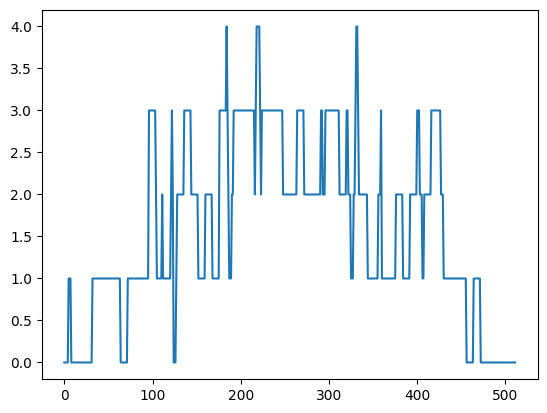

In [26]:
plt.plot(img)

In [3]:
train_data_generator  = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,fill_mode='nearest')

In [34]:
input_data = train_data_generator.flow_from_directory(Data_training_path,target_size=(150,150),color_mode='grayscale',class_mode='categorical')

Found 2870 images belonging to 4 classes.


In [33]:
batch = input_data[0]


array([0., 0., 1., 0.], dtype=float32)

C:\Users\ANING\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


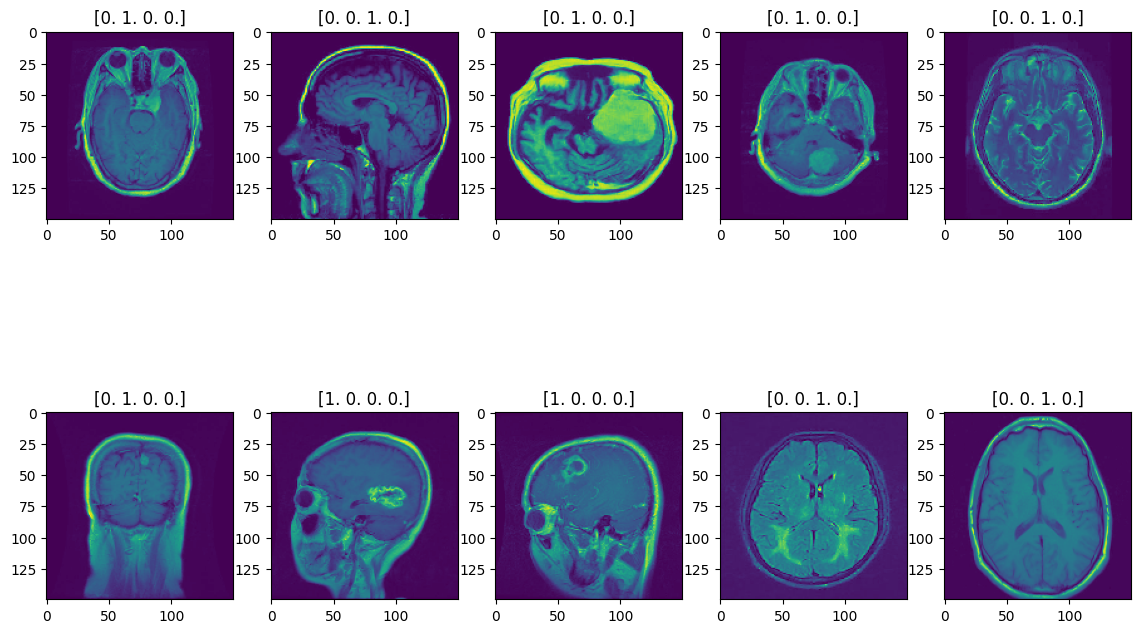

In [35]:
plt.figure(figsize=(14,14))
x,y = 3,5
for i in range(10):
    xmp = batch[0][i]
    labels = batch[1][i]
    plt.subplot(x,y,i+1)
    plt.imshow(xmp)
    plt.title(labels)


In [6]:
model  = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape=(150,150,1)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='softmax'))
          

In [39]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [40]:
history = model.fit(input_data,batch_size=32,epochs=10)

Epoch 1/10
90/90 [==============================] - 537s 6s/step - loss: 0.2709 - accuracy: 0.7585
Epoch 2/10
90/90 [==============================] - 535s 6s/step - loss: 0.2048 - accuracy: 0.8300
Epoch 3/10
90/90 [==============================] - 542s 6s/step - loss: 0.1398 - accuracy: 0.9010
Epoch 4/10
90/90 [==============================] - 616s 7s/step - loss: 0.0967 - accuracy: 0.9334
Epoch 5/10
90/90 [==============================] - 622s 7s/step - loss: 0.0631 - accuracy: 0.9610
Epoch 6/10
90/90 [==============================] - 587s 7s/step - loss: 0.0450 - accuracy: 0.9732
Epoch 7/10
90/90 [==============================] - 609s 7s/step - loss: 0.0279 - accuracy: 0.9861
Epoch 8/10
90/90 [==============================] - 595s 7s/step - loss: 0.0256 - accuracy: 0.9882
Epoch 9/10
90/90 [==============================] - 592s 7s/step - loss: 0.0155 - accuracy: 0.9923
Epoch 10/10
90/90 [==============================] - 602s 7s/step - loss: 0.0051 - accuracy: 0.9976


In [43]:
model.save('brain_tumor_model.h5')

In [47]:
acc =history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))

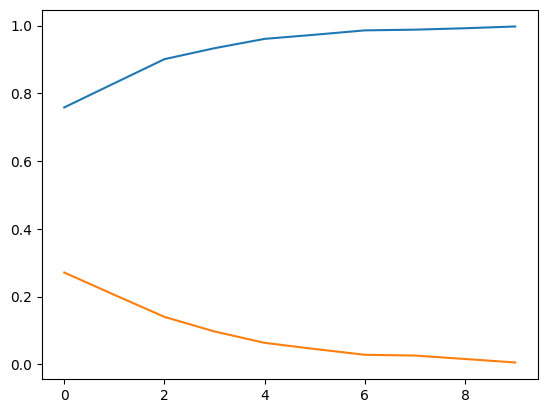

In [48]:
plt.plot(epochs,acc)
plt.plot(epochs,loss)

In [97]:
pred_array = []
for x in os.listdir(r"C:\Users\ANING\Downloads\archive\Training\no_tumor"):
    full_path =  r"C:\Users\ANING\Downloads\archive\Training\no_tumor\\"+x
    img = cv.imread(full_path)
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    # img = np.resize(img,(150,150))
    img.shape
    # img = np.expand_dims(img,-1)
    # img = np.expand_dims(img,0)
    # prediction = model.predict(img)
    # prediction = np.argmax(prediction)
    # pred_array.append(prediction)



In [94]:
len(pred_array)

395

In [92]:
total =0
for x in pred_array:
    if x == 1:
        total +=1
    else:
        pass

In [93]:
total

242

In [114]:
img = cv.imread(r"C:\Users\ANING\Downloads\archive\Training\pituitary_tumor\p (88).jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = np.resize(img,(150,150))
img = np.expand_dims(img,-1)
img = np.expand_dims(img,0)
prediction = model.predict(img)
prediction


1/1 [==============================] - 0s 75ms/step


array([[0., 1., 0., 0.]], dtype=float32)

In [80]:
prediction = np.argmax(prediction)
prediction

0